In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class LogisticRegression:
    
    def __init__(self, eta=0.01, reg='l2', reg_coeff=0.01, n_iter=1000, th = 1e-4):
        self.eta = eta
        self.reg = reg
        self.reg_coeff = reg_coeff
        self.n_iter = n_iter
        self.th = th
        self.w = None
        self.entropy = None
        
    def fit(self, X, y):
        v=np.ones((X.shape[0],1))
        X=np.append(v,X,axis=1)
        N, D = X.shape
        
        self.w = np.zeros(D)
        self.entropy = []
        
        for j in range(self.n_iter):
            err=0
            for i in range(N):
                y_pred = self.sigmoid(np.dot(X[i],self.w))
                d = y_pred - y[i]
                
                if self.reg == 'l1':
                    dw = np.dot(X[i].T,d) + self.reg_coeff * np.sign(self.w)
                else :
                    dw = np.dot(X[i].T,d) + self.reg_coeff * self.w
                    
                self.w -= self.eta*dw
                err += self.cross_entropy(y[i],y_pred)
            self.entropy.append(err/N)
            if j!=0:
                if (self.entropy[j-1] - self.entropy[j]) < self.th:
                    break
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    
    def cross_entropy(self,y ,y_pred): 
        if y==1:
            error = -np.log(y_pred)
        else:
            error = -np.log(1-y_pred)
        
        return error
    
    
    def predict_prob(self, X):
        v = np.ones((X.shape[0],1))
        X = np.append(v,X,axis=1)
        y_pred = self.sigmoid(np.dot(X, self.w))
        return y_pred
    
    def score(self,X,y):
        y_pred=self.predict_prob(X)
        y_pred=[1 if n >= 0.5 else 0 for n in y_pred]
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy
    
    def weights(self):
        return self.w
    
    def error(self):
        return np.array(self.entropy)

In [ ]:
df=pd.read_csv(r'heart.csv')

In [ ]:
df['cp']=df['cp'].astype('object')
df['slope']=df['slope'].astype('object')
df['thal']=df['thal'].astype('object')

In [ ]:
X=df.iloc[:,df.columns !='target']
y=df.iloc[:,df.columns =='target']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25 , random_state=100)

In [55]:
from feature_engine.encoding import OneHotEncoder
encoder=OneHotEncoder(variables=['cp','slope','thal'] ,drop_last=True)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
y_train=y_train.values
y_test=y_test.values

In [58]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [59]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.868421052631579

In [60]:
error = clf.error()
print(error)

[0.50559485 0.41053547 0.39302169 0.38560855 0.38156891 0.37909754
 0.3774777  0.3763632  0.37556719 0.37498129 0.37453914 0.37419836
 0.37393092 0.37371771 0.37354534 0.37340426 0.37328747 0.3731898 ]


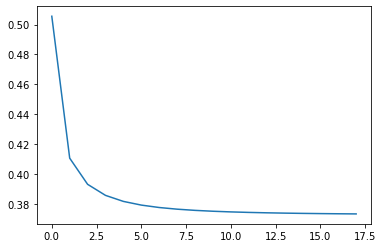

In [61]:
plt.plot(error)